In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta
import seaborn as sns
import geopandas as gpd


### URBAN RURAL

In [15]:
urban = pd.read_csv("data/urban_rural.csv")

counts = urban['Urban_rural_flag'].value_counts()
proportions = counts / counts.sum()
print(proportions)

Urban_rural_flag
Urban    0.989739
Rural    0.010261
Name: count, dtype: float64


In [16]:
counts = urban['RUC21NM'].value_counts()
print(counts)

RUC21NM
Urban: Nearer to a major town or city            8874
Smaller rural: Nearer to a major town or city      51
Larger rural: Nearer to a major town or city       41
Name: count, dtype: int64


### POPULATION DENSITY

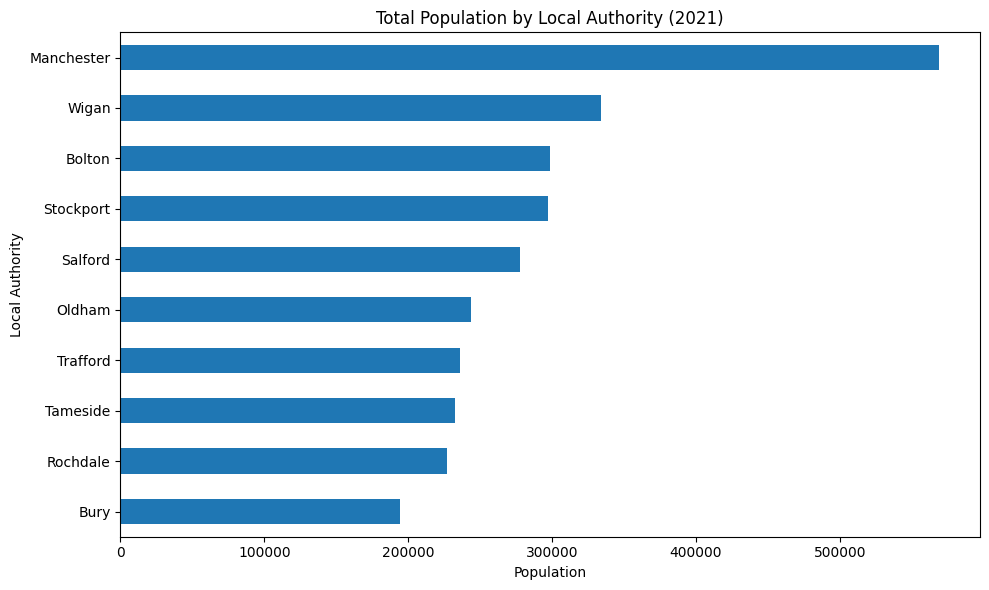

In [17]:
popden = pd.read_csv("data/population_density.csv", dtype={"LAD2021": "string", "OA21CD": "string", "Total": "Int64"})

# Sum Total by local authority
pop_by_lad = popden.groupby("LAD2021")["Total"].sum().sort_values()

plt.figure(figsize=(10,6))
pop_by_lad.plot(kind="barh")
plt.title("Total Population by Local Authority (2021)")
plt.xlabel("Population")
plt.ylabel("Local Authority")
plt.tight_layout()
plt.show()

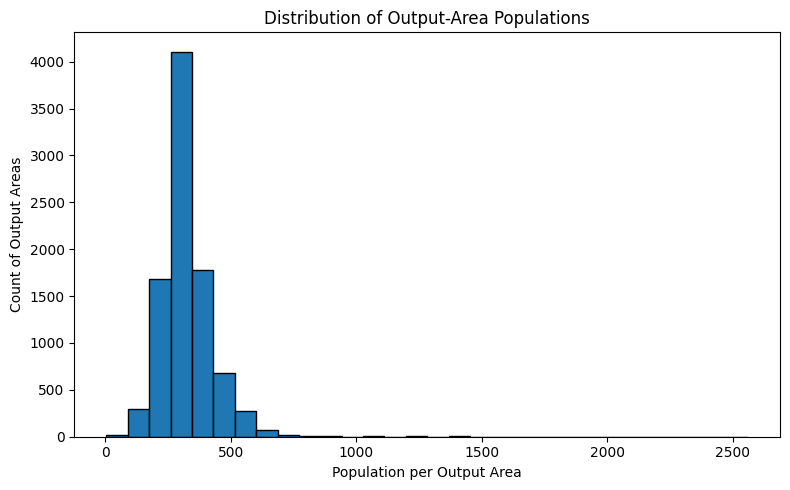

In [18]:
plt.figure(figsize=(8,5))
popden["Total"].plot(kind="hist", bins=30, edgecolor="black")
plt.title("Distribution of Output-Area Populations")
plt.xlabel("Population per Output Area")
plt.ylabel("Count of Output Areas")
plt.tight_layout()
plt.show()

In [19]:
merged = popden.merge(urban, on="OA21CD", how="left")
popden_urbanrural = merged[['LAD2021','OA21CD','Total','Urban_rural_flag']]

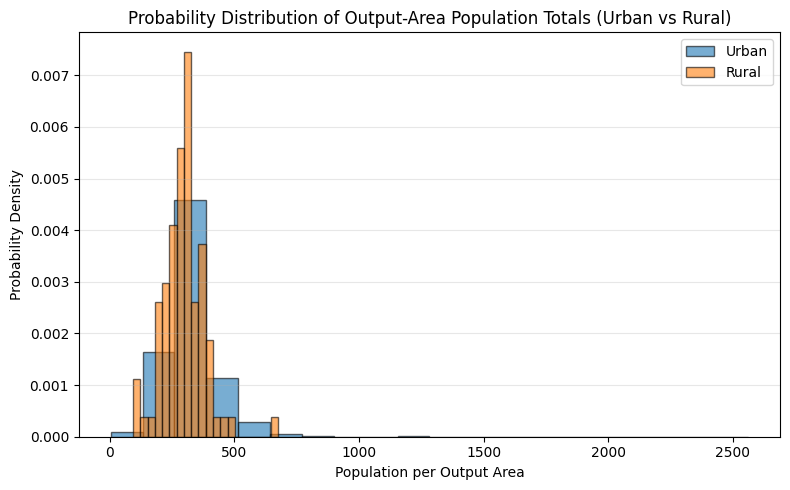

In [20]:

urban  = popden_urbanrural[popden_urbanrural["Urban_rural_flag"].str.lower() == "urban"]["Total"]
rural  = popden_urbanrural[popden_urbanrural["Urban_rural_flag"].str.lower() == "rural"]["Total"]

plt.figure(figsize=(8, 5))
plt.hist(urban, bins=20, alpha=0.6, density=True, label="Urban", edgecolor="black")
plt.hist(rural, bins=20, alpha=0.6, density=True, label="Rural", edgecolor="black")

plt.title("Probability Distribution of Output-Area Population Totals (Urban vs Rural)")
plt.xlabel("Population per Output Area")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

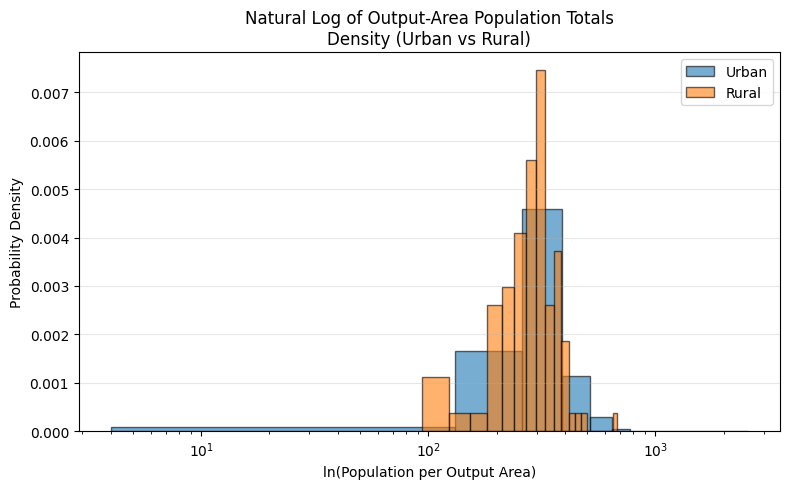

In [29]:
plt.figure(figsize=(8,5))
plt.hist(urban, bins=20, alpha=0.6, density=True, label="Urban", edgecolor="black")
plt.hist(rural, bins=20, alpha=0.6, density=True, label="Rural", edgecolor="black")

plt.xscale("log")
plt.title("Natural Log of Output-Area Population Totals\nDensity (Urban vs Rural)")
plt.xlabel("ln(Population per Output Area)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

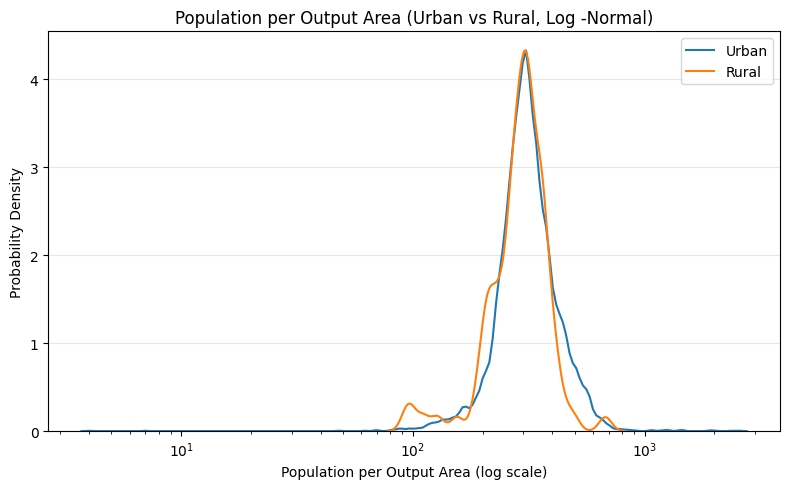

In [28]:
plt.figure(figsize=(8,5))
sns.kdeplot(urban, bw_adjust=0.5, log_scale=True, label="Urban", fill=False)
sns.kdeplot(rural, bw_adjust=0.5, log_scale=True, label="Rural", fill=False)
# Use a log scale for the x-axis
plt.xscale("log")

plt.title("Population per Output Area (Urban vs Rural, Log -Normal)")
plt.xlabel("Population per Output Area (log scale)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

### DISABILITY RATE

In [ ]:
disability = pd.read_csv("data/disabled.csv")
total_disability = disability.groupby('Disability (3 categories)')['Observation'].sum()
print(total_disability)

Disability (3 categories)
Disabled under the Equality Act         525975
Does not apply                               0
Not disabled under the Equality Act    2341787
Name: Observation, dtype: int64


In [ ]:
disability_probs = total_disability / total_disability.sum()
print(disability_probs)

Disability (3 categories)
Disabled under the Equality Act        0.18341
Does not apply                         0.00000
Not disabled under the Equality Act    0.81659
Name: Observation, dtype: float64


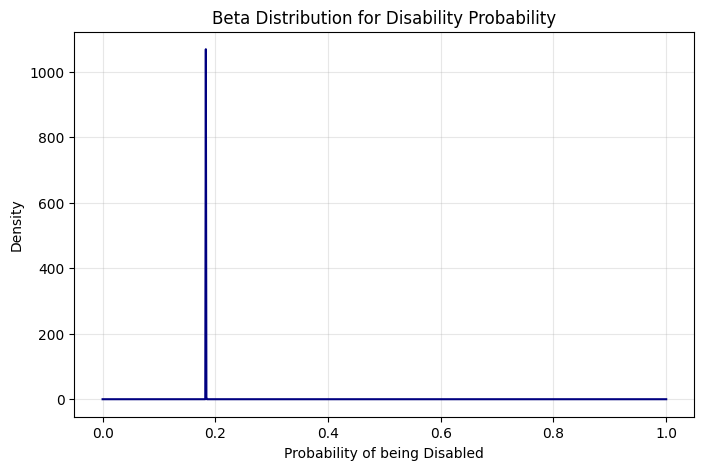

In [ ]:
disabled_count = total_disability.get('Disabled under the Equality Act', 0)
not_disabled_count = total_disability.get('Not disabled under the Equality Act', 0)

alpha = disabled_count + 1
beta_param = not_disabled_count + 1

x = np.linspace(0, 1, 1000)  # probability range from 0 to 1
y = beta.pdf(x, alpha, beta_param)

plt.figure(figsize=(8, 5))
plt.plot(x, y, color="navy")
plt.title("Beta Distribution for Disability Probability")
plt.xlabel("Probability of being Disabled")
plt.ylabel("Density")
plt.grid(True, alpha=0.3)
plt.show()

### ENGLISH PROFICIENCY

In [ ]:
english = pd.read_csv("data/english_proficiency.csv")   
total_english = english.groupby('Proficiency in English language (4 categories)')['Observation'].sum()
print(total_english)

NameError: name 'pd' is not defined

In [ ]:
def map_proficiency(category):
    if category in [
        "Main language is English (English or Welsh in Wales)",
        "Main language is not English (English or Welsh in Wales): Can speak English very well or well"
    ]:
        return "Good English Proficiency"
    elif category == "Main language is not English (English or Welsh in Wales): Cannot speak English or cannot speak English well":
        return "Bad English Proficiency"
    else:
        return None

# Apply mapping
english['Proficiency_Group'] = english['Proficiency in English language (4 categories)'].apply(map_proficiency)

# Sum observations per new group
grouped_english = english.groupby('Proficiency_Group')['Observation'].sum()
print(grouped_english)

Proficiency_Group
Bad English Proficiency       66412
Good English Proficiency    2699191
Name: Observation, dtype: int64


In [ ]:
english_probs = grouped_english / grouped_english.sum()
print(english_probs)

Proficiency_Group
Bad English Proficiency     0.024014
Good English Proficiency    0.975986
Name: Observation, dtype: float64


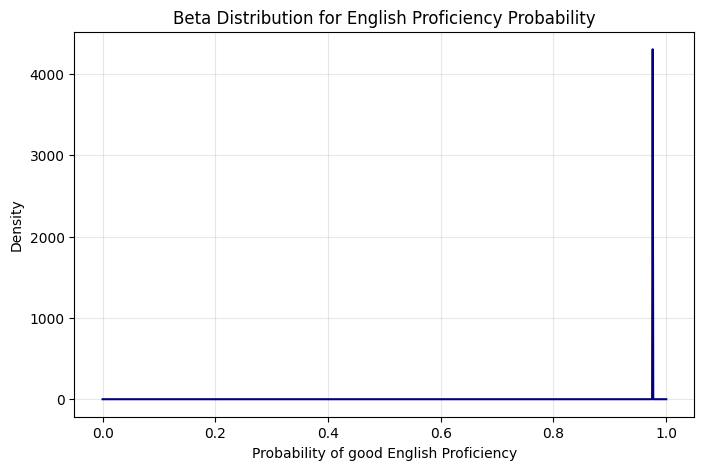

In [ ]:
good_english_count = grouped_english.get('Good English Proficiency', 0)
bad_english_count = grouped_english.get('Bad English Proficiency', 0)

alpha = good_english_count + 1
beta_param = bad_english_count + 1

x = np.linspace(0, 1, 1000)  # probability range from 0 to 1
y = beta.pdf(x, alpha, beta_param)

plt.figure(figsize=(8, 5))
plt.plot(x, y, color="navy")
plt.title("Beta Distribution for English Proficiency Probability")
plt.xlabel("Probability of good English Proficiency")
plt.ylabel("Density")
plt.grid(True, alpha=0.3)
plt.show()

### Low-income

In [ ]:
'''
Low income threshold = 60% of median
'''

### MEAN PROPERTY VALUE

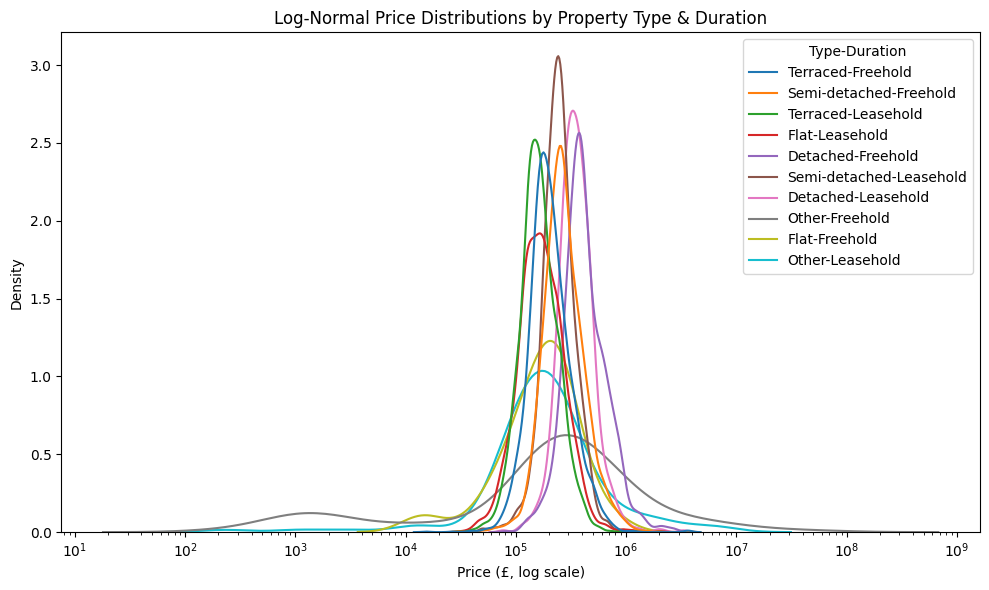

In [ ]:
property = pd.read_csv("data/property_value.csv")
df = property.dropna(subset=['price', 'property_type', 'duration'])
df = df[df['price'] > 0]

type_map = {
    "T": "Terraced",
    "S": "Semi-detached",
    "D": "Detached",
    "F": "Flat",
    "O": "Other"
}

duration_map = {
    "F": "Freehold",
    "L": "Leasehold"
}
df["property_type"] = df["property_type"].map(type_map)
df["duration"] = df["duration"].map(duration_map)
df['Type-Duration'] = df['property_type'].astype(str) + "-" + df['duration'].astype(str)

# Plot overlapping distributions on a log scale
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df,
    x="price",
    hue="Type-Duration",
    fill=False,
    common_norm=False,
    log_scale=True 
)

plt.title("Log-Normal Price Distributions by Property Type & Duration")
plt.xlabel("Price (£, log scale)")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

### DISTANCE TO WATER

In [22]:
shapefile_path = "data/water_dist/Watercourse.shp"
gdf = gpd.read_file(shapefile_path)

#gdf.to_csv("Watercourse.csv")
gdf = gdf[~gdf.geometry.is_empty].copy()
gdf.head()




,name1,identifier,startNode,endNode,form,flow,fictitious,length,name2,geometry
0,None,4F9D4F34-F9D4-4584-A198-3DA9078F0F26,28BCA985-5D27-471B-91DE-68BB336B4B1E,B0BD9600-1CEC-47F2-87B1-5D772A28EE1D,lake,in direction,false,602,None,"LINESTRING Z (396545 420759 0, 396509.37 42067..."
1,None,DDCE5CD7-EE06-4510-8843-2F39E6B6EB0C,1C2F610B-57ED-4CCC-A8E1-0D8043E27397,95E8F126-341B-4E83-9844-7F1E3B68E1F7,lake,in direction,false,322,None,"LINESTRING Z (396117.97 420377.04 0, 396032.64..."
2,None,8EA0E400-43C9-41BC-8609-EEBBCF1B69F1,887A8038-32C2-44D9-B255-AA091E428B5E,97A5C4AE-0661-4391-9705-36BD736631F2,inlandRiver,in direction,false,140,None,"MULTILINESTRING Z ((396473.05 420737.08 0, 396..."
3,None,A9F068B2-F3DB-4EE8-ADCF-4763EC76CC1D,12A7F149-C5DD-4F53-A295-3029C9BD1B7B,28BCA985-5D27-471B-91DE-68BB336B4B1E,inlandRiver,in direction,false,71,None,"LINESTRING Z (396545.519 420770.424 0, 396545 ..."
4,River Roch,9F69086D-A577-4A69-9F24-B553AC6B27C9,0F047099-F7B5-48D3-9945-1044A5A65752,713A776F-AD05-46BD-8F54-2939CD1A72EC,inlandRiver,in direction,false,736,None,"LINESTRING Z (394550.23 417843.45 0, 394526 41..."


In [ ]:
'''
# used to created the watercourse density shapefile of 1 km grid cells

import geopandas as gpd
from shapely.geometry import box
import numpy as np


def grid_density(gdf_lines, cell_size_m=1000, clip_shapefile=None):
    """Return a GeoDataFrame of square cells with columns: area_km2, length_km, density_km_per_km2"""
    minx, miny, maxx, maxy = gdf_lines.total_bounds
    # extend bounds a touch so edges align
    xmin = np.floor(minx / cell_size_m) * cell_size_m
    ymin = np.floor(miny / cell_size_m) * cell_size_m
    xmax = np.ceil(maxx / cell_size_m) * cell_size_m
    ymax = np.ceil(maxy / cell_size_m) * cell_size_m

    xs = np.arange(xmin, xmax, cell_size_m)
    ys = np.arange(ymin, ymax, cell_size_m)

    cells = []
    for x in xs:
        for y in ys:
            cells.append(box(x, y, x + cell_size_m, y + cell_size_m))

    cells_gdf = gpd.GeoDataFrame({"geometry": cells}, crs=gdf_lines.crs)
    cells_gdf["area_km2"] = (cell_size_m * cell_size_m) / 1e6  # constant per cell

    if clip_shapefile is not None:
        if isinstance(clip_shapefile, str):
            clip_gdf = gpd.read_file(clip_shapefile).to_crs(gdf_lines.crs)
        else:
            clip_gdf = clip_shapefile.to_crs(gdf_lines.crs)

        # test centroids
        cells_gdf = cells_gdf[cells_gdf.centroid.within(clip_gdf.unary_union)]

    lengths = []
    for cell in cells_gdf.geometry:
        inter = gdf_lines.geometry.intersection(cell)
        # some intersections return empty geometries; sum lengths
        total_m = sum(geom.length for geom in inter if not geom.is_empty)
        lengths.append(total_m / 1000.0)  # km

    cells_gdf["length_km"] = lengths
    cells_gdf["density_km_per_km2"] = cells_gdf["length_km"] / cells_gdf["area_km2"]

    return cells_gdf

# 1 km grid
shapefile_path = "data/Watercourse-rough/Watercourse-rough.shp"
gdf = gpd.read_file(shapefile_path)
gdf["length_km"] = gdf.geometry.length / 1000.0
clip_area = gpd.read_file("GM_shapefile/CAUTH_MAY_2025_EN_BSC.shp")

# Compute density per 1 km^2 cells
grid = grid_density(gdf, cell_size_m=1000, clip_shapefile=clip_area)
grid.to_file("watercourse_density.shp")'''

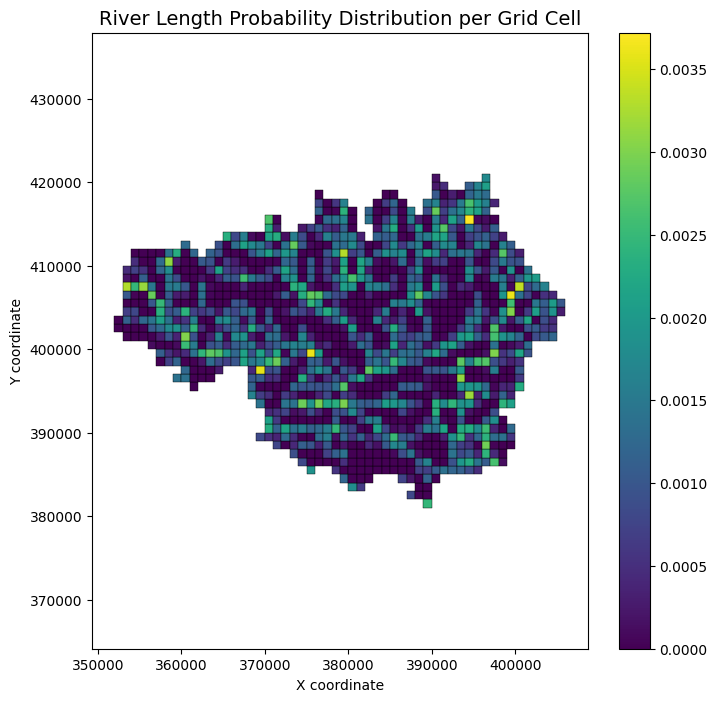

In [ ]:
shapefile_path = "data/watercourse_intensity/watercourse_density.shp"
gdf = gpd.read_file(shapefile_path)
#gdf.to_csv("watercourse_density.csv")

###
total_length = gdf["length_km"].sum()
gdf["probability"] = gdf["length_km"] / total_length

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

gdf.plot(column="probability",  # color by probability
          cmap="viridis",         # color map (yellow = high, purple = low)
          legend=True,            # show legend
          edgecolor="black",      # cell borders
          linewidth=0.3, 
          ax=ax)

ax.set_title("River Length Probability Distribution per Grid Cell", fontsize=14)
ax.set_xlabel("X coordinate")
ax.set_ylabel("Y coordinate")
plt.axis("equal")
plt.show()
###

In [24]:
shapefile_path = "GM_shapefile/CAUTH_MAY_2025_EN_BSC.shp"
gdf = gpd.read_file(shapefile_path)

#gdf.to_csv("Watercourse.csv")
gdf.head()

,CAUTH25CD,CAUTH25NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,E47000001,Greater Manchester,377929,401095,-2.334239,53.506093,2cd120b0-49d3-47f6-8753-c8a211253e65,"POLYGON ((391239.202 421037.699, 391814.303 41..."


In [25]:
import geopandas as gpd
from shapely.ops import nearest_points
from shapely.geometry import Point

def grid_points_in_polygon(polygon, spacing=50):
    """
    Generate uniform points inside a polygon.
    spacing: distance between points in CRS units (e.g., meters)
    """
    minx, miny, maxx, maxy = polygon.bounds
    x_coords = np.arange(minx, maxx, spacing)
    y_coords = np.arange(miny, maxy, spacing)
    points = [Point(x, y) for x in x_coords for y in y_coords if polygon.contains(Point(x, y))]
    return points

'''def nearest_water_distance(point, water_gdf):
    # Create a unary union of all watercourse geometries
    water_union = water_gdf.unary_union
    nearest_pt = nearest_points(point, water_union)[1]
    return point.distance(nearest_pt)
'''
# Read area shapefile (could be points or polygons)
area_gdf = gpd.read_file("GM_shapefile/CAUTH_MAY_2025_EN_BSC.shp")

# Read watercourse shapefile
water_gdf = gpd.read_file("data/Watercourse-rough/Watercourse-rough.shp")

area_points = area_gdf.copy()
area_points["geometry"] = area_points.centroid

polygon = area_gdf.geometry.iloc[0]
uniform_points = grid_points_in_polygon(polygon, spacing=50)

points_gdf = gpd.GeoDataFrame(geometry=uniform_points, crs=area_gdf.crs)
# Create a union of all watercourse geometries
water_union = water_gdf.unary_union

# Compute distances
points_gdf["distance_to_water"] = points_gdf.geometry.apply(lambda x: x.distance(water_union))


/var/folders/d3/znvz13bs5j5bm0wtx19c85wm0000gn/T/ipykernel_2016/3070808023.py:30: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  water_union = water_gdf.unary_union


KeyboardInterrupt: 

### 